In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Understanding the Data
print(data.shape)
print(data.describe())


(284807, 31)
                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [2]:
# Determine the number of fraud cases in the dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))



0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [3]:
# Print the amount details for Fraudulent Transactions
print("Amount details of the fraudulent transaction")
print(fraud['Amount'].describe())

# Print the amount details for Normal Transactions
print("Details of valid transaction")
print(valid['Amount'].describe())


Amount details of the fraudulent transaction
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Details of valid transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


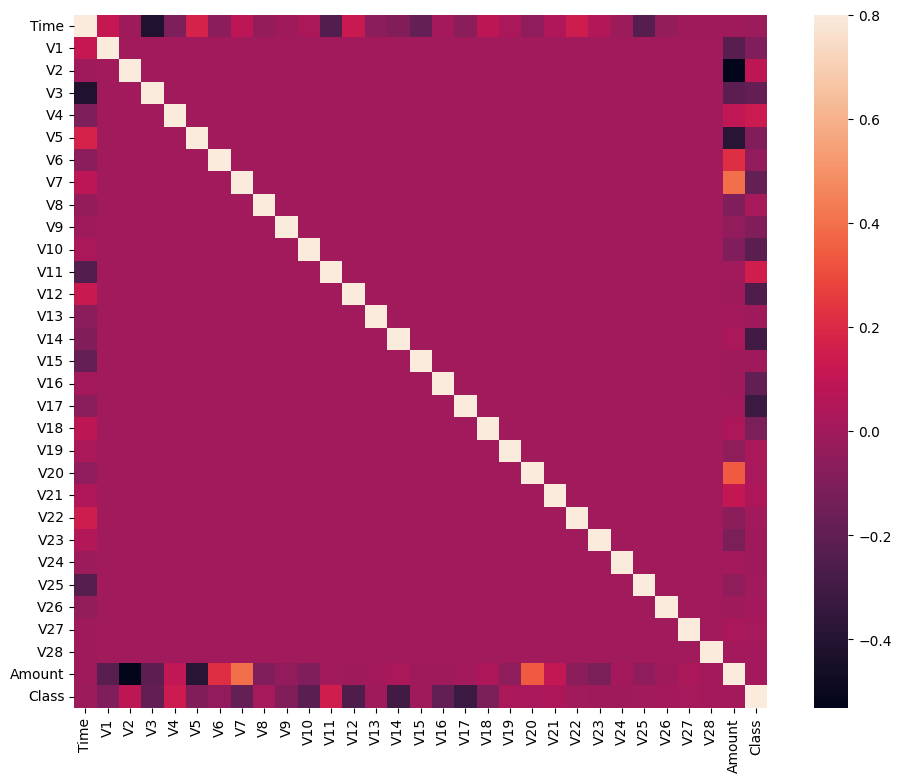

(284807, 30)
(284807,)


In [4]:
# Plot the Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Separating the X and Y values
X = data.drop(['Class'], axis=1)
Y = data['Class']
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

In [5]:
# Separating the X and Y values
X = data.drop(['Class'], axis=1)
Y = data['Class']
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values


(284807, 30)
(284807,)


In [6]:

# Splitting the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)

# Building the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  # Handling potential convergence issues
log_reg.fit(xTrain, yTrain)

yPred = log_reg.predict(xTest)

# Evaluating the classifier
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Logistic Regression")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Logistic Regression
The accuracy is 0.9989291106351603
The precision is 0.8135593220338984
The recall is 0.4897959183673469
The F1-Score is 0.6114649681528662
The Matthews correlation coefficient is 0.630785580957534


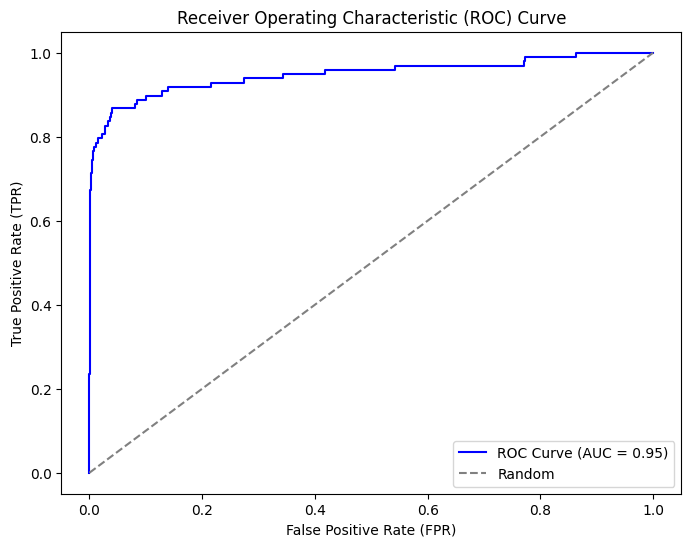

In [7]:
from sklearn.metrics import roc_curve, auc

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(yTest, log_reg.decision_function(xTest))

# Compute Area Under the Curve (AUC) for ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


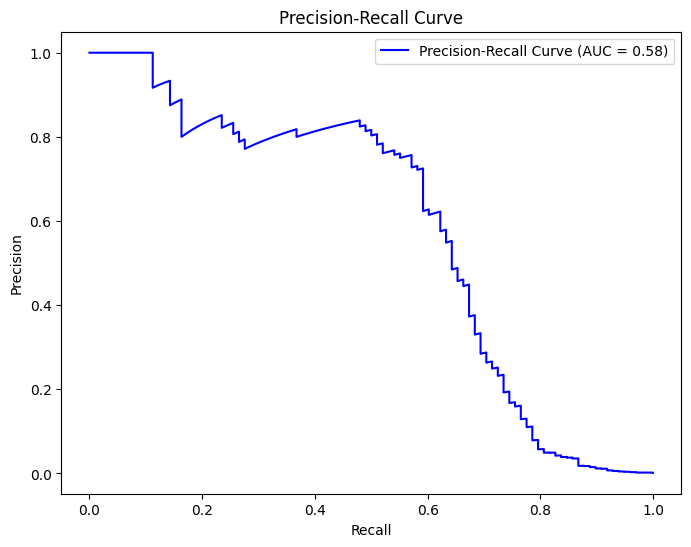

In [8]:
from sklearn.metrics import precision_recall_curve, auc

# Get the precision and recall values
precision, recall, _ = precision_recall_curve(yTest, log_reg.decision_function(xTest))

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


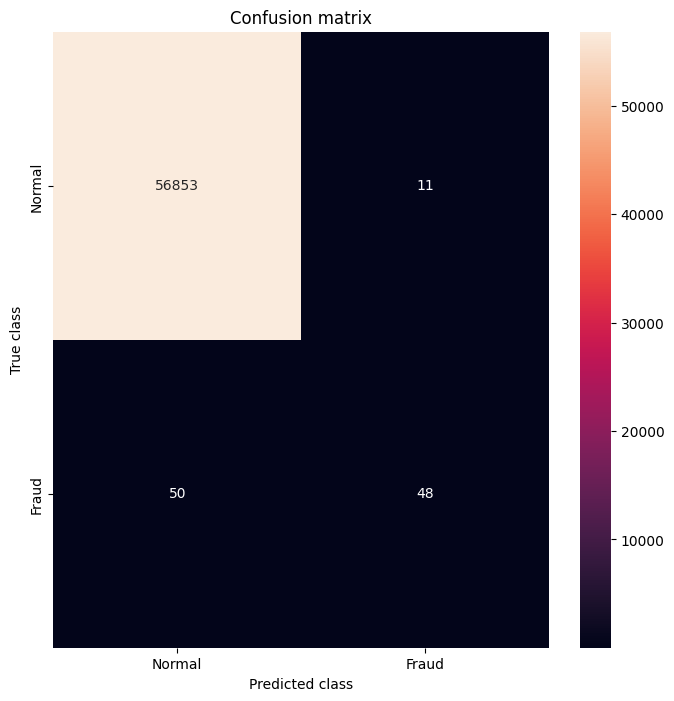

In [9]:
# Visualizing the Confusion Matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
